## Synthetic Numerical Optimization

Usage guide:
1. NumericalProgramSampler initialization defines the random search space for the program (but it does NOT generate the program)
   - `program = NumericalProgramSampler(chain_length=3, logic_prob=0, max_gen_var=2)`
   - This only defines a class of problems
   - `param_num` defines how many inputs it takes in.
3. Sample a problem from the problem space:
   - `output = program(inpt, seed=3232)`
   - We currently use `seed` to uniquely specify a program. The same seed means regardless of input, it will go through the same program.
   - Different seed means different programs


### Trace Example

In [1]:
from number_synthetic import NumericalProgramSampler
from autogen.trace.nodes import node
from autogen.trace.nodes import GRAPH
from autogen.trace.propagators import function_propagate

In [2]:
program = NumericalProgramSampler(chain_length=3, param_num=1, logic_prob=0, max_gen_var=2)

In [3]:
y = program(node(5, "node_x"), seed=1234)

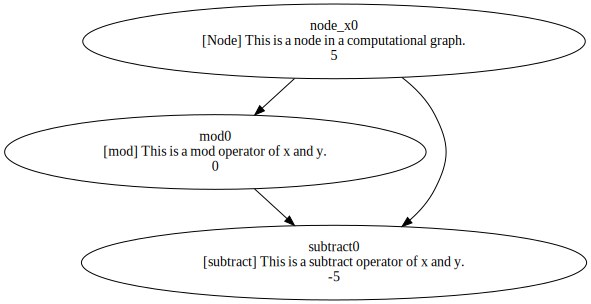

In [4]:
y.backward(visualize=True, feedback="Correct", propagate=function_propagate())

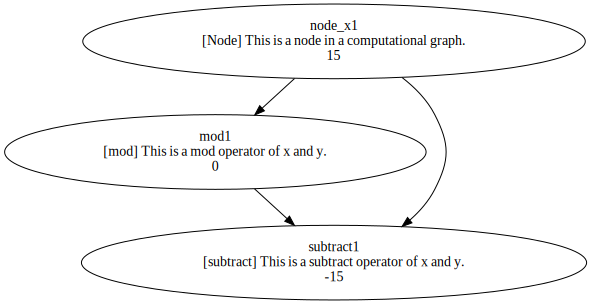

In [5]:
y = program(node(15, "node_x"), seed=1234)
y.backward(visualize=True, feedback="Correct", propagate=function_propagate())

### Torch Example

In [6]:
import torch

In [19]:
x = torch.tensor([5.], requires_grad=True)
y = program(x, seed=1234)
y

tensor([-5.], grad_fn=<SubBackward0>)

In [20]:
y.backward()

In [21]:
x.grad

tensor([-1.])